# Bases fréquentielles : les transformées

En plusieurs étapes : 
   - échantillonnage de $e^{i2\pi ft}$ dans le temps et en fréquence ;
   - Discrete Cosine Tronsform pour ceux qui n'ont pas d'imagination
   - Transformée de Fourier Discrète


Prenons toujours notre vecteur (1,2,3) que nous pouvons associer à des bases temporelles des espaces suivant :

* $\mathbb{R}^3_{DCT-II}$ : espace des suite réelles paire et périodiques pour les DCT
* $\mathbb{R}^3_p$ : espace des suites périodiques de 3 points pour les TFD (ou FFT)
* $\mathbb{R}^{\mathbb{Z}}$ : espace des suites réelles pour la TFSD.   

In [4]:
clear all
close all
clc
v= [1 ; 2 ; 3] % on prend des coordonnées
j = (0:2)';   % indice de base canonique temporelle
    % associé aux instants   [ 0    1.Te    2.Te  ] 


v =

   1
   2
   3



# Echantillonnage en fréquences

Nous cherchons à construire une base de signaux discrets localisés en fréquence pour décomposer tout signal discret bornés de N points.

Il faut donc choisir un nombre de N fréquences, qui donneront N vecteur de base fréquentielle, qui permettrons de représenter des signaux discrets bornés sur N points.


## Sous échantillonnage des fréquences : repliement de spectre

Dans notre exemple, on veut une base de fréquences de dimension 3 pour avoir un isomorphisme.

Prenons arbitrairement les fréquences entières 0,1,2, et échantillonnons l'exponentielle complexe aux instants associés et aux fréquences associées.

$t \leftrightarrow j. T_e \quad$  et  $\quad f \leftrightarrow n.F_e$

Nous travaillons en temps et fréquence normalisées (les variables sont $\frac{t}{T_e}$ et $\frac{f}{F_e}$, ce qui permet de "faire comme si" $T_e=1=F_e$)

In [32]:
n=0:2 ;
%% utilisons le Broadcast et la vectorisation pour calculer
% toutes les composantes d'un coup
% temps en rangées (j est vertical) 
% et lignes en fréquence (n horizontal)

% attention n*j marche et donne un scalaire
% j*n n'est pas défini en math et provoque le broadcast voulu
W =  exp(i*2*pi*j*n);

% arrondi au centieme pour aff
centieme = @(x) round(x*100)/100;
centieme(W)

error: operator *: nonconformant arguments (op1 is 1x3, op2 is 1x3)
error: 'W' undefined near line 1 column 10


Ben oui ! on échnatillone l'exponentielle aux multiples de sa période !  
En effet le $j.n$ est toujours entier et donc ...

Regardons en 3d pour mieux comprendre :

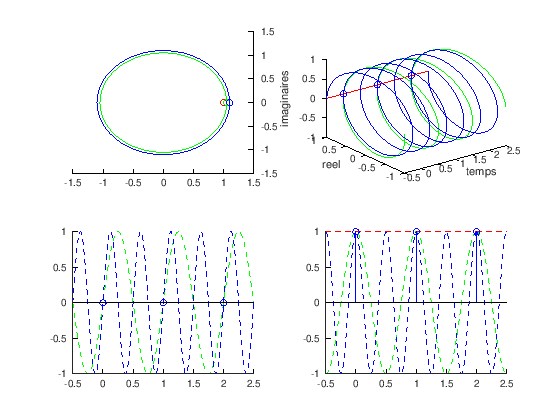

In [152]:
t=-0.5:0.01:2.5 ; %vecteur temps quasi-continu et infini.
s  = exp(i*2*pi*t'*n);

%% fonction dans utiles/affiche3d.m
addpath("./utiles")
affiche3d(t,s,j,W)

C'est le premier effet du repliement de spectre vu en temporel : toutes les fréquences espacé de $N.F_e$ donnent les même vecteurs.

Décalons un peu les fréquences pour voir que $0.3Hz$, $1.3Hz$ et $2.3Hz$ donnent les mêmes signaux !

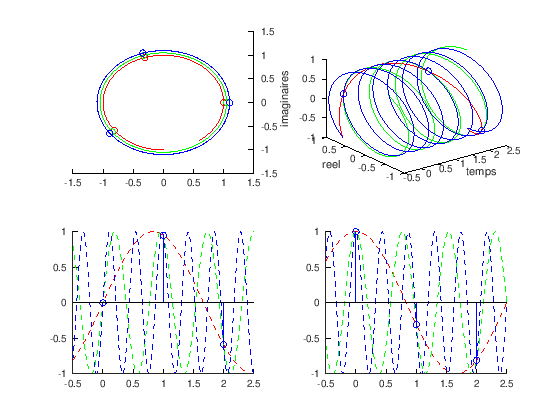

In [153]:
t=-0.5:0.01:2.5 ; %vecteur temps quasi-continu et infini.
f = n +0.3 ;
s  = exp(i*2*pi*t'*f);
W =  exp(i*2*pi*j*f);
affiche3d(t,s,j,W)

> Les fréquences multiples de Fe donnent les mêmes vecteurs donc les coefficient de projection d'un signal à ces fréquences seront les même :  
> **Le spectre en fréquence est donc de période $F_e$** du fait de m'échantillonnage temporel de résolution $T_e$


Il faut une résolution fréquentielle inférieure à Fe ! Car on est $F_e$ périodique en fréquences par échantillonage temporel.

## Sur-échantillonage des fréquences : famille liée 

Prenons un pas inférieur à Fe très fin! disons 0.01 Hz

norme_w0 =  3
norme_w2 =  0.50000 + 1.53884i
norme_i_w0 = -3


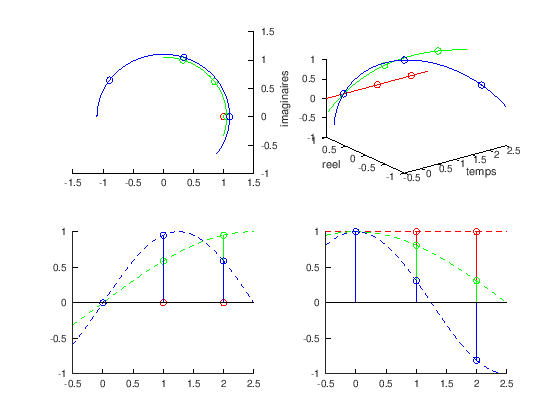

In [154]:
t=-0.5:0.01:2.5 ; %vecteur temps quasi-continu et infini.
f = n*0.1;
s  = exp(i*2*pi*t'*f);
W =  exp(i*2*pi*j*f);
affiche3d(t,s,j,W);

scalaires = transpose(W)*W;

w0 = W(:,1);
w2 = W(:,2);
norme_w0 = transpose(w0)*w0
norme_w2 = transpose(w2)*w2

norme_i_w0 = transpose(i*w0)*(i*w0)

norme_w0 =  3
norme_w2 =  0.50000 + 1.53884i
norme_i_w0 = -3


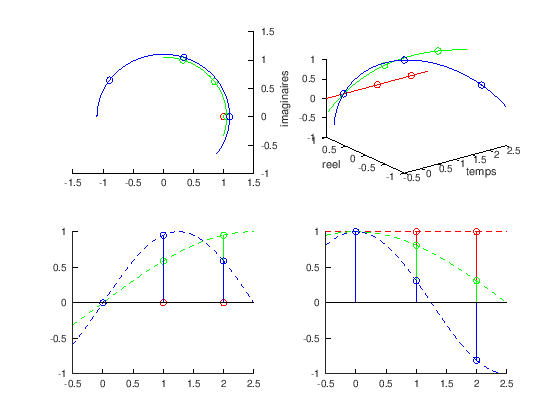

In [155]:
t=-0.5:0.01:2.5 ; %vecteur temps quasi-continu et infini.
f = n*0.1;
s  = exp(i*2*pi*t'*f);
W =  exp(i*2*pi*j*f);
affiche3d(t,s,j,W);

scalaires = transpose(W)*W;

w0 = W(:,1);
w2 = W(:,2);
norme_w0 = transpose(w0)*w0
norme_w2 = transpose(w2)*w2

norme_i_w0 = transpose(i*w0)*(i*w0)

Nos fréquences sont trop lentes et ce n'est pas orthogonal tout cela : **les vecteurs sont liés !**

Autant le produit scalaire ${}^T\!w_0.w_0$ donne $3$ ce qui est normal pour le vecteur (1,1,1).
Autant les autres produits scalaire sont complexes voire négatif ! ça ne va pas !

## Produit scalaires pour les vecteurs complexes

**Pour les vecteurs de $\mathbb{C}^N$ il n'y a pas de produit scalaire bilinéaire.**

> On définit un produit scalaire hermitien :
> $<u,v> = \overline{{}^T\!v}. u$

**Attention à la convention du "bra" ($<u,$) et du "ket" ($, v>$) ici le "ket" est transposé et conjugué à gauche**  
On utilise cette convention qui correspond lors de décomposition avec une fonction à gauche et un vecteur de base à droite :  
> On est linéaire à gauche : $<\lambda f+g, w> = \lambda<f,w> + <g,w>$ (linéaire pour les fonctions à décomposer sur w)  
> et semi-linéaire à droite: $<f, \lambda.w_0+w_1> = \overline{\lambda}<f,w_0> + <g,w_1>$ (conjugué sur les composantes de la base w)
> $<u,v> = \overline{<v,u>}$  donc un scalaire peut être maintenant un nombre complexe !
> mais une norme, reste une norme : $<u,u> = \|u\|^2 \geq0$

**le produit scalaire hermitien est sesqui-linéaire voulant dire linéaire et demi...**

In [156]:
%% avec matlab l'opérateur ' est le conjugué hermitien 
%% x' = conj(transpose(x)) = transpose(conj(x))

norme_w0 = w0'*w0
norme_w2 = w2'*w2
norme_i_w0 = (i*w0)'*(i*w0)

%% On peut définir un produit scalaire en fonction lambda
scal = @(bra,ket) ket'*bra;
scal_w0_w2 = centieme(scal(w0,w2))
scal_w2_w0 = centieme(scal(w2,w0))

norme_w0 =  3
norme_w2 =  3
norme_i_w0 =  3
scal_w0_w2 =  2.1200 - 1.5400i
scal_w2_w0 =  2.1200 + 1.5400i


## Base fréquentielle orthogonale : TFD

Maintenant cherchons des fréquences orthogonales, comme nous avons trouvé des instants orthogonaux !
En effet, pour choisir la fréquence on peut s'inspirer des séries de Fourier car les signaux sont périodiques.

* Avec les SdF, le signal continu de période $T_0$  est décomposé aux fréquences multiples  : $f = n.\frac{1}{T_0} = n.F_0$

* Avec la TFD, le signal discret de période $N.T_e$  est décomposé aux fréquences multiples : $f = n . \frac{1}{N.T_e} = n \frac{F_e}{N}$

Ici, avec $N=3$ et une fréquence normalisée $F_e=1$, cela donne $f= 0 , 1/3 , 2/3$

Essayons donc

scal_w0_w2 = -0
norm_carre_w2 =  3


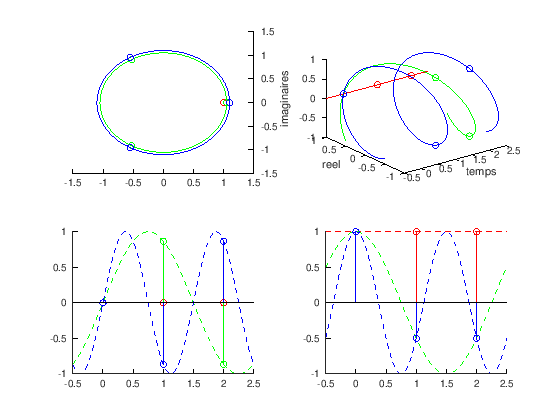

In [157]:
t=-0.5:0.01:2.5 ; %vecteur temps quasi-continu et infini.
Fe= 1; N = 3;
Df = Fe/N;
f = n*Df;
s  = exp(i*2*pi*t'*f);
W =  exp(i*2*pi*j*f);
affiche3d(t,s,j,W);

w0 = W(:,1);
w2 = W(:,2);
scal_w0_w2 = centieme(scal(w0,w2))
norm_carre_w2 = scal(w2,w2)
scalaires = W'*W;


Nous obtenons ainsi une base orthogonale, et nous pouvons donner les coordonnées du vecteur dans cette base.

$B_f=\left(k\mapsto e^{i2\pi.\frac{n.k}{N}}\right)_{n\in[\![0; N|\![}$

Ce changement de base correspond exactement à la Transformée de Fourier Discrète, où la composante $n$ associée à la fréquence $n\frac{F_e}{N}$ s'obtient en projetant sur la base :

$TFD[s] = \hat{S} : \quad \begin{array}{ccc} [\![0 \;;\; N[\![ & \longrightarrow & \mathbb{C}\\ n  & \longmapsto  &   \hat{S}[n]\quad =\quad <\!< s[\bullet], e^{i \frac{2\pi}{N} n . \bullet}>\!>_p  \quad= \sum\limits_{k=0}^{N-1}{s[k], \overline{e^{i \frac{2\pi}{N} n . k}}}\end{array}$

Donc la TFD est l'application qui donne les composantes d'un signal $\vec{s}$ dans la base fréquencielle $B_f=\left(k\mapsto e^{i2\pi.\frac{n.k}{N}}\right)_{n\in[\![0; N|\![}$ et l'on a :

$\left|\begin{array}{cl} s[0] &= <\!< s[\bullet], \delta_0[\bullet]>\!>_p \\ s[1] &= <\!< s, \delta_1>\!>_p \\ \vdots &\\s[j] &= <\!< s, \delta_j>\!>_p =\sum\limits_{k=0}^{N-1}{s[k].\overline{\delta_j[k]} }\\ \vdots &\\ s[N-1] &= <\!< s, \delta_{N-1}>\!>_p\end{array}\right|_{B_t} \quad = \quad \vec{v} \quad = \quad \left|\begin{array}{cl} \hat{S}[0] &= <\!< s[\bullet], 1>\!>_p \\ \hat{S}[1] &= <\!< s, e^{i 2\pi \frac{1}{N} \bullet}>\!>_p \\ \vdots &\\ \hat{S}[n] &= <\!< s, e^{i 2\pi \frac{n}{N} \bullet}>\!>_p \quad=\quad\sum\limits_{k=0}^{N-1}{s[k], \overline{e^{i \frac{2\pi}{N} n . k}}}\\ \vdots &\\\hat{S}[N-1] &= <\!< s, e^{i 2\pi\frac{N-1}{N} \bullet}>\!>_p \end{array}\right|_{B_f}$

On trouve la transformée par calcul matriciel, mais **attention la base n'est pas normée !** et amplifie le signal $\sqrt{N}$


In [106]:
TFD_v = W * v
norme = @(v) sqrt(v'*v) ;
Norm_v = norme(v)
Norm_TFD_v = norme(TFD_v)

amplification = Norm_TFD_v/Norm_v;

amplification_vaut_sqrt_3 = centieme(amplification - sqrt(3)) == 0


scalaires = centieme(W'*W)

v_reconstruit = centieme(W' * TFD_v)

TFD_v =

   6.0000
  -2.0000
   2.0000
  -2.0000

Norm_v =  3.7417
Norm_TFD_v =  6.9282
amplification_vaut_sqrt_3 = 0
scalaires =

   4  -0   0
  -0   2   0
   0   0   4

v_reconstruit =

    4
    4
   12



Le vecteur ainsi reconstruit est 3 fois (N fois) trop grand !


On peut normaliser la base et diviser par $\sqrt{N}$ la base $B_f$. Et ainsi on obtient des matrice de passage symétriques orthogonales et une formule de recomposition symétrique :
${}^T\!\overline{\frac{W}{\sqrt{N}}} . \frac{W}{\sqrt{N}} = \mathrm{Id}$.  Ce qui donne des formules avec des $\frac{1}{\sqrt{N}}$ : 

> La **TFD Normalisée** utilise la base b.o.n $B_f=\left(k\mapsto \frac{e^{i2\pi.\frac{n.k}{N}}}{\sqrt{N}}\right)_{n\in[\![0; N|\![}$  
>$s[k]  \overset{TFD}{\rightarrow} \hat{S}[n] = \frac{1}{\sqrt{N}} . \sum\limits_{k=0}^{N-1}{s[k], \overline{e^{i \frac{2\pi}{N} n . k}}}$
 et en recomposant  :  
> $\hat{S}[n]  \overset{{TFD}^{-1}}{\rightarrow} s[k] = \frac{1}{\sqrt{N}} . \sum\limits_{n=0}^{N-1}{\hat{S}[n], e^{i \frac{2\pi}{N} n . k}}$
 
Numériquement cette division par un irrationnel n'est pas pratique, on préfère en général la base orthogonale "trop grande" et on compense cette amplification en chageant la formule de recomposition (TFD inverse) : 
${}^T\overline{W}. W  = N .\mathrm{Id} \implies \underbrace{\frac{{}^T\overline{W}}{N}}_{TFD^{-1}}. W = \mathrm{Id}$,

donc 
> La **TFD usuelle** utilise la base orthogonale $B_f=\left(k\mapsto e^{i2\pi.\frac{n.k}{N}}\right)_{n\in[\![0; N|\![}$ de longueur $\sqrt{N}$ 
> ce qui donne  
> $s[k]  \rightarrow \hat{S}[n] = \sum\limits_{k=0}^{N-1}{s[k], \overline{e^{i \frac{2\pi}{N} n . k}}}$
 sans division, et implique une **division par N pour la transformée inverse**  plus sympathique  
 $\hat{S}[n]  \rightarrow s[k] = \frac{1}{N} . \sum\limits_{n=0}^{N-1}{\hat{S}[n], e^{i \frac{2\pi}{N} n . k}}$

Cela donne en numérique pour N=3 :

In [194]:
Wtfd = W;
Wtfd_inverse= W'/N;
v_reconstruit = centieme(Wtfd_inverse * TFD_v)

WtfdBon = W/sqrt(N);
WtfdBon_inverse= WtfdBon';
TfdBon_v = WtfdBon * v;
v_reconstruit_bon = centieme(WtfdBon_inverse * TfdBon_v)

Tfd_inv_de_Tfd = centieme(Wtfd_inverse * Wtfd)

TfdBon_inv_de_TfdBon = centieme(WtfdBon_inverse * WtfdBon)



v_reconstruit =

   1
   2
   3

v_reconstruit_bon =

   1
   2
   3

Tfd_inv_de_Tfd =

   1  -0   0
  -0   1  -0
   0  -0   1

TfdBon_inv_de_TfdBon =

   1  -0   0
  -0   1  -0
   0  -0   1



# Direct Cosine Transform

La TFD utilise un prolongement des échantillons de $\mathbb{R}^N$ en considérant les suites périodiques de $\mathbb{R}^N_p$ les conséquences sont :
  - fonction prolongée de parité quelconque donc transformée étant une suite complexe (on peut faire avec deux suite a(n) et b(n) réelles comme pour les séries)
  - le prolongement n'est pas "continu" dans le cas général $\implies$ des composantes hautes fréquences (pour les grand n) issue du phénomène de Gibs)
    
On peut éviter ces écceuils en cherchant un prolongement de suite réelles qui soit pair, périodique et "continu" 



Nous avons vus dans [bases temporelles](bases_temporelles.ipynb) qu'il y a plusieur prolongement de v de $\mathbb{R}^3$ dans $\mathbb{R}^\mathbb{Z}$ 

Au lieu de faire un prolongement de v en un vecteur N-périodique de $\mathbb{R}^N_b$ en transformant v=(1,2,3) en  $v|_{B_z}=$(...,1,2,3,1,2,3,...)  
Nous utilisons **un des prolongement** 2N-périodique pair qui est celui de $\mathbb{R}^N_b$ transformant v en $v|_{B_z}=$(..., 1,2,3,3,2,1,...)

**Remarquons que pour que ce signal soit pair il faut considérer un décalage du premier échantillon d'indice n=0  à l'instant $\frac{Te}{2}$ non plus à l'instant 0**



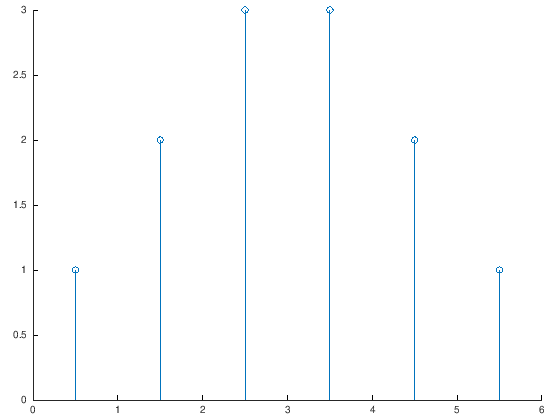

In [124]:
peigne = @(k,T) mod(k,T)==0; 
decal = 1/2;
N = 3;  % 3 points
j = (0:N-1) + decal;
periode = 2*N;
k = (0:(periode-1))' + decal;

M_Bz_Bdct = peigne(k-j,periode) + ...
            peigne(k-(periode-j),periode) ;

v_Bz = M_Bz_Bdct * v ;

stem(k,v_Bz);  box off;

La fenêtre de temps/période du signal étant $2N.T_e$. Nous avons une résolutions en fréquence double.

Car en mimant les séries de Fourier nous avons $F_0=\Delta_f= \frac{1}{2NT_e}= \frac{Fe}{2N}$

> On retient que plus on augmente le nombre de point, plus la fenêtre temporelle (période) est large  
> plus la résolution fréquencielle (pas d'échantillonnage des fréquences) est fine.

Dans notre cas il faudra donc les fréquences multiples de $\frac{Fe}{2N}=\frac{1}{6}$.

**Attention au décalage du premier échantillons qui n'est pas en 0 mais en $\frac{T_e}{2}$ !** Il faut donc redéfinir la base fréquencielle à ces instant là....

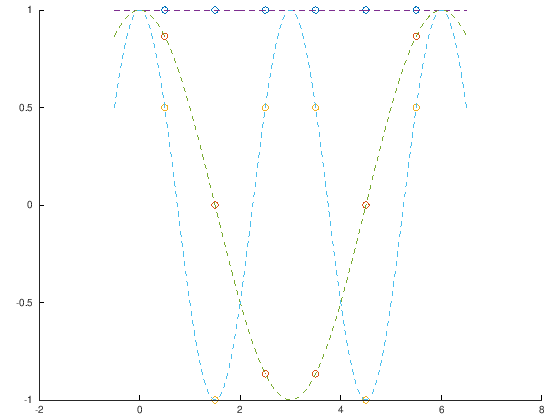

In [133]:
n=(0:(2*N-1));
k=n'+0.5;

M_Bz_Bf= cos(2*pi*k*n/(2*N));

t=-0.5:0.01:6.5 ; %vecteur temps quasi-continu et infini.
s  = cos(2*pi*t'*n/(2*N));

voir = 1:3;
%voir = [1,4];
plot(k,M_Bz_Bf(:,voir),'o'); box off; hold on;
plot(t,s(:,voir),'--');

Vérifions que les vecteurs soient bien indépendants, orthogonaux et normés




In [134]:
centieme(M_Bz_Bf)
scalaires = transpose(M_Bz_Bf)*M_Bz_Bf;
centieme(scalaires)

Norme = centieme(sqrt(sum(scalaires)))


ans =

   1.00000   0.87000   0.50000   0.00000  -0.50000  -0.87000
   1.00000   0.00000  -1.00000  -0.00000   1.00000   0.00000
   1.00000  -0.87000   0.50000   0.00000  -0.50000   0.87000
   1.00000  -0.87000   0.50000  -0.00000  -0.50000   0.87000
   1.00000  -0.00000  -1.00000   0.00000   1.00000   0.00000
   1.00000   0.87000   0.50000  -0.00000  -0.50000  -0.87000

ans =

   6  -0  -0  -0  -0  -0
  -0   3  -0  -0  -0  -3
  -0  -0   3  -0  -3  -0
  -0  -0  -0   0   0   0
  -0  -0  -3   0   3   0
  -0  -3  -0   0   0   3

Norme =

   2.45000   0.00000   0.00000   0.00000   0.00000   0.00000



Mais on a mis trop de vecteur de fréquences !
Il en suffit de trois !



In [141]:
n=(0:(N-1));
k=(0:(2*N-1))'+0.5;
M_Bz_Bf= cos(2*pi*k*n/(2*N));
M_Bz_Bf(:,1) = M_Bz_Bf(:,1)/sqrt(2);
centieme(M_Bz_Bf)

scalaires = centieme(M_Bz_Bf' * M_Bz_Bf)

M_Bdct_Bf = M_Bz_Bdct' * M_Bz_Bf 

centieme(M_Bdct_Bf*M_Bdct_Bf')

ans =

   0.71000   0.87000   0.50000
   0.71000   0.00000  -1.00000
   0.71000  -0.87000   0.50000
   0.71000  -0.87000   0.50000
   0.71000  -0.00000  -1.00000
   0.71000   0.87000   0.50000

scalaires =

   3  -0  -0
  -0   3  -0
  -0  -0   3

M_Bdct_Bf =

   1.4142e+00   1.7321e+00   1.0000e+00
   1.4142e+00  -1.2246e-16  -2.0000e+00
   1.4142e+00  -1.7321e+00   1.0000e+00

ans =

   6   0  -0
   0   6  -0
  -0  -0   6



On peut avoir finalement une représentation temporelle et une fréquencielle du même vecteur signal.

Inutile de représenter une signal pair périodique : l'espace du signal est de dimension 3 et donc seule 3 informations suffisent.

